### Leap Year

Start with a 20k TCV contract with a start date of January 2024 and an end date of January 2026.

In [23]:
contract = ContractHeader(20_000, date(2024, 1, 15), date(2026, 1, 14))

dont_generalize_leap_year = annualize(contract, date(2024, 6, 30), "Day", False)

generalize_leap_year = annualize(contract, date(2024, 6, 30), "Day", True)

print("Results of leap year")
print(f"Not generalizing leap year: {dont_generalize_leap_year:.2f}")
print(f"Generalizing leap year: {generalize_leap_year}")

Results of leap year
Not generalizing leap year: 10013.68
Generalizing leap year: 10000.0


Simple thought would suggest that 20k TCV of 2 years will have a 10k ACV, but **take caution when getting as granular in days, because leap years will make an appearance**. Let's look at the implication of this over time. Consider the below 3 year deal and let's ask, "What is the ACV of this contract month over month? and how do leap years show in the data?"

$
\begin{matrix}
\text{Contract} & \text{Start Date} & \text{End Date} & \text{Total Contract Value} \\
\text{001} & \text{06/15/2023} & \text{06/14/2025} & 30000 
\end{matrix}
$

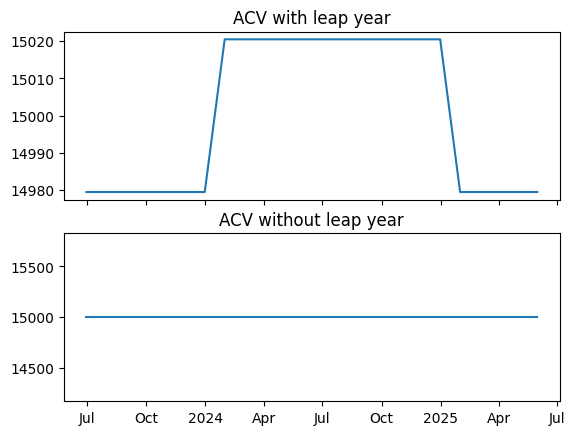

In [24]:
from matplotlib.dates import ConciseDateFormatter
import matplotlib.pyplot as plt
import numpy as np


contract = ContractHeader(30_000, date(2023, 6, 15), date(2025, 6, 14))

date_range = get_end_of_month_range(date(2023, 6, 1), date(2025, 6, 1))

results_w_leap_year = np.array(
    [annualize(contract, month, "Day", False) for month in date_range]
)

results_wo_leap_year = np.array(
    [annualize(contract, month, "Day", True) for month in date_range]
)

fig, (ax1, ax2) = plt.subplots(2, sharex=True)

ax1.plot(date_range, results_w_leap_year)

ax2.plot(date_range, results_wo_leap_year)

ax1.set_title("ACV with leap year")

ax2.set_title("ACV without leap year")

ax1.xaxis.set_major_formatter(ConciseDateFormatter(ax1.xaxis.get_major_locator()))

ax2.xaxis.set_major_formatter(ConciseDateFormatter(ax2.xaxis.get_major_locator()))

plt.show()

# TODO: Match Y axis & make Y axis land on 15k.

<div class="alert alert-block alert-warning">
The difference here is only $20 dollars, but imagine this scaled across an enterprise company. Contracts with terms over leap years will see their ARR rise in the beginning of a leap year and fall at the end of a leap year. My recommendation, if you are going to annualize by day, <a href="https://en.wikipedia.org/wiki/KISS_principle">K.I.S.S</a>. <b>Hard code the day value to be 365 and move on.</b> I can see some reasons where you want to see this swing in data, but many companies will be just fine with 365 days every year.
</div>

Let's continue the leap year analysis, with another contract.

In [25]:
short_contract = ContractHeader(25_000, date(2024, 1, 1), date(2024, 3, 31))

no_gen_leap_year = annualize(
    short_contract, date(2024, 3, 31), "Day", False, print_details=True
)
print(f"\nNot generalizing leap year: {no_gen_leap_year:.2f}\n")

print(f"---")

gen_leap_year = annualize(
    short_contract, date(2024, 3, 31), "Day", True, print_details=True
)
print(f"\nGeneralizing leap year: {gen_leap_year:.2f}\n")

ContractHeader(amount=25000, start_date=datetime.date(2024, 1, 1), end_date=datetime.date(2024, 3, 31), booking_date=datetime.date(2024, 1, 1))
Period: 2024-03-31
Generalize Leap Year: False
Time Interval: Day - 366
Contract Term: 91

Not generalizing leap year: 100549.45

---
ContractHeader(amount=25000, start_date=datetime.date(2024, 1, 1), end_date=datetime.date(2024, 3, 31), booking_date=datetime.date(2024, 1, 1))
Period: 2024-03-31
Generalize Leap Year: True
Time Interval: Day - 365
Contract Term: 90

Generalizing leap year: 101388.89



Why is this 25k contract still showing an odd amount when annualizing by day, even with `generalize_leap_year` set to `True`? Let's do some math.

$\begin{matrix}
\text{Formula:} &
\text{Annual Contract Value} = \text{Total Contract Value} * (\frac{\text{Time Interval (Year)}}{\text{Contract Term Length}})\\
\\
\text{Generalizing leap year = False:} &
100,549 = 25,000 * (\frac{366}{91})\\
\\
\text{Generalizing leap year = True:} &
101,388 = 25,000 * (\frac{365}{90})
\end{matrix}
$

General wisdom tells us that this 3 month contract should be multiplied by 4. 12 months in a year divided by 3 months of the contract multiplied by total contract value. $25,000 * \frac{12}{3} = 100,000$. But regardless of removing leap days from the equation, you will always have less days in the first half of a year than in the second half of the year. Which means, annualizing by day in the first half will always give an unconventional result when comparing to the full year.

<div class="alert alert-block alert-warning">
You've been warned. Another risk of annualizing by day. Still do-able, but leap years add a ton of implications.
</div>


### Contracts Less Than 1 Year

Sales people *always be closing*. Which means never underestimate the creativity of a sales team. They will do what they need to do to make the company money. Which means contracts could have shorter lengths, ramp, and could have all kinds of discounts or variability. For this section, the focus will be on shorter contracts. Shorter contracts intended to renew, can force a big swing in the reporting when not renewed.

First, I'll setup some code to show this smaller contract in the context of other contracts.

In [26]:
short_contract = Contract(
    1,
    ContractHeader(10_000, date(2024, 1, 1), date(2024, 3, 31)),
    [
        ContractLine(2_500, date(2024, 1, 1), date(2024, 3, 31), 1, True),
        ContractLine(2_500, date(2024, 1, 1), date(2024, 3, 31), 2, True),
        ContractLine(2_500, date(2024, 1, 1), date(2024, 3, 31), 3, True),
        ContractLine(2_500, date(2024, 1, 1), date(2024, 3, 31), 4, True),
    ],
)

reg_contract1 = Contract(
    2,
    ContractHeader(10_000, date(2024, 1, 1), date(2024, 12, 31)),
    [
        ContractLine(10_000, date(2024, 1, 1), date(2024, 12, 31), 1, True),
    ],
)

reg_contract2 = Contract(
    3,
    ContractHeader(10_000, date(2024, 1, 1), date(2024, 12, 31)),
    [
        ContractLine(10_000, date(2024, 1, 1), date(2024, 12, 31), 1, True),
    ],
)

print(short_contract, reg_contract1, reg_contract2, sep="\n\n")

          Contract #1 - $10,000 - 2024-01-01           
                2024-01-01 - 2024-03-31                
*******************************************************
sku	start date	end date	amount	renewable
*******************************************************
1	2024-01-01	2024-03-31	2500	True
2	2024-01-01	2024-03-31	2500	True
3	2024-01-01	2024-03-31	2500	True
4	2024-01-01	2024-03-31	2500	True
*******************************************************


          Contract #2 - $10,000 - 2024-01-01           
                2024-01-01 - 2024-12-31                
*******************************************************
sku	start date	end date	amount	renewable
*******************************************************
1	2024-01-01	2024-12-31	10000	True
*******************************************************


          Contract #3 - $10,000 - 2024-01-01           
                2024-01-01 - 2024-12-31                
*******************************************************
sku	start date	

In [27]:
build_contracts_table([short_contract, reg_contract1, reg_contract2])

,id,header_amount,header_start_date,header_end_date,booking_date,line_amount,line_start_date,line_end_date,item_sku,renewable
0,1,10000,2024-01-01,2024-03-31,2024-01-01,2500,2024-01-01,2024-03-31,1,True
1,1,10000,2024-01-01,2024-03-31,2024-01-01,2500,2024-01-01,2024-03-31,2,True
2,1,10000,2024-01-01,2024-03-31,2024-01-01,2500,2024-01-01,2024-03-31,3,True
3,1,10000,2024-01-01,2024-03-31,2024-01-01,2500,2024-01-01,2024-03-31,4,True
4,2,10000,2024-01-01,2024-12-31,2024-01-01,10000,2024-01-01,2024-12-31,1,True
5,3,10000,2024-01-01,2024-12-31,2024-01-01,10000,2024-01-01,2024-12-31,1,True


Take note of the $\text{2,500}$ line amounts for Contract # 1.

In [28]:
build_acv_table([short_contract, reg_contract1, reg_contract2])

period                 2024-01-31  2024-02-29  2024-03-31  2024-04-30  \
id item_sku renewable                                                   
1  1        True          10000.0     10000.0     10000.0         0.0   
   2        True          10000.0     10000.0     10000.0         0.0   
   3        True          10000.0     10000.0     10000.0         0.0   
   4        True          10000.0     10000.0     10000.0         0.0   
2  1        True          10000.0     10000.0     10000.0     10000.0   
3  1        True          10000.0     10000.0     10000.0     10000.0   

period                 2024-05-31  2024-06-30  2024-07-31  2024-08-31  \
id item_sku renewable                                                   
1  1        True              0.0         0.0         0.0         0.0   
   2        True              0.0         0.0         0.0         0.0   
   3        True              0.0         0.0         0.0         0.0   
   4        True              0.0         0.0         0.0         0.0   
2  1        True          10000.0     10000.0     10000.0     10000.0   
3  1        True          10000.0     10000.0     10000.0     10000.0   

period                 2024-09-30  2024-10-31  2024-11-30  2024-12-31  
id item_sku renewable                                                  
1  1        True              0.0         0.0         0.0         0.0  
   2        True              0.0         0.0         0.0         0.0  
   3        True              0.0         0.0         0.0         0.0  
   4        True              0.0         0.0         0.0         0.0  
2  1        True          10000.0     10000.0     10000.0     10000.0  
3  1        True          10000.0     10000.0     10000.0     10000.0

When annualizing contracts **shorter** than 1 year, the ACV increases from the TCV. Annualizing contracts **longer** than 1 year, the ACV decreases from TCV. The implications of shorter contracts mean the company will chase after a larger ACV in a shorter amount of time. The example above shows that. Contract # 1 has 4 lines at 2.5k each. When annualizing, the 2.5k increases into 10k, but quickly falls to 0 when the contract is over.

In my experience, shorter contracts are often used as a back door *trial/demo*. It's a way to give a customer the product for a short period of time. This means the renewal implications are not always the same as a full year contract or more, so you're likely to see the big swing in shorter contracts on the down side.

<div class="alert alert-block alert-warning">
At scale, seeing the quick rise and fall of shorter contracts can often push a business decision to not annualize contracts shorter than a 1 year time frame.
</div>

### Ramp Contracts

A [ramp contract](https://dealhub.io/glossary/ramp-deal/) will have a change in price during the term of the contract. A common reason for ramp contracts is to lock the customer in for multiple years. The first year starts at price, then the subsequent years increase in price over time.

In [29]:
ramp_contract = Contract(
    1,
    ContractHeader(36_000, date(2024, 1, 1), date(2026, 12, 31)),
    [
        ContractLine(4_000, date(2024, 1, 1), date(2024, 12, 31), 1, True),
        ContractLine(4_000, date(2024, 1, 1), date(2024, 12, 31), 2, True),
        ContractLine(6_000, date(2025, 1, 1), date(2025, 12, 31), 1, True),
        ContractLine(6_000, date(2025, 1, 1), date(2025, 12, 31), 2, True),
        ContractLine(8_000, date(2026, 1, 1), date(2026, 12, 31), 1, True),
        ContractLine(8_000, date(2026, 1, 1), date(2026, 12, 31), 2, True),
    ],
)
ramp_contract

          Contract #1 - $36,000 - 2024-01-01           
                2024-01-01 - 2026-12-31                
*******************************************************
sku	start date	end date	amount	renewable
*******************************************************
1	2024-01-01	2024-12-31	4000	True
2	2024-01-01	2024-12-31	4000	True
1	2025-01-01	2025-12-31	6000	True
2	2025-01-01	2025-12-31	6000	True
1	2026-01-01	2026-12-31	8000	True
2	2026-01-01	2026-12-31	8000	True
*******************************************************

Contract # 1 has a TCV of $\text{36k}$, over the course of 3 years. It has two different items in the contract and ramps up 2k each year for each item. Often times, ACV calculations will only annualize by header dates of contracts. Annualizing at the header does not give the full story.

In [30]:
by_lines = build_acv_table([ramp_contract])
by_header = build_acv_table([ramp_contract], False)

print("ARR of Ramp Contract by Header Dates")
display(by_header)
print("ARR of Ramp Contract by Line Dates")
display(by_lines)

ARR of Ramp Contract by Header Dates


period                 2024-01-31  2024-02-29  2024-03-31  2024-04-30  \
id item_sku renewable                                                   
1  1        True           6000.0      6000.0      6000.0      6000.0   
   2        True           6000.0      6000.0      6000.0      6000.0   

period                 2024-05-31  2024-06-30  2024-07-31  2024-08-31  \
id item_sku renewable                                                   
1  1        True           6000.0      6000.0      6000.0      6000.0   
   2        True           6000.0      6000.0      6000.0      6000.0   

period                 2024-09-30  2024-10-31  ...  2026-03-31  2026-04-30  \
id item_sku renewable                          ...                           
1  1        True           6000.0      6000.0  ...      6000.0      6000.0   
   2        True           6000.0      6000.0  ...      6000.0      6000.0   

period                 2026-05-31  2026-06-30  2026-07-31  2026-08-31  \
id item_sku renewable                                                   
1  1        True           6000.0      6000.0      6000.0      6000.0   
   2        True           6000.0      6000.0      6000.0      6000.0   

period                 2026-09-30  2026-10-31  2026-11-30  2026-12-31  
id item_sku renewable                                                  
1  1        True           6000.0      6000.0      6000.0      6000.0  
   2        True           6000.0      6000.0      6000.0      6000.0  

[2 rows x 36 columns]

ARR of Ramp Contract by Line Dates


period                 2024-01-31  2024-02-29  2024-03-31  2024-04-30  \
id item_sku renewable                                                   
1  1        True           4000.0      4000.0      4000.0      4000.0   
   2        True           4000.0      4000.0      4000.0      4000.0   

period                 2024-05-31  2024-06-30  2024-07-31  2024-08-31  \
id item_sku renewable                                                   
1  1        True           4000.0      4000.0      4000.0      4000.0   
   2        True           4000.0      4000.0      4000.0      4000.0   

period                 2024-09-30  2024-10-31  ...  2026-03-31  2026-04-30  \
id item_sku renewable                          ...                           
1  1        True           4000.0      4000.0  ...      8000.0      8000.0   
   2        True           4000.0      4000.0  ...      8000.0      8000.0   

period                 2026-05-31  2026-06-30  2026-07-31  2026-08-31  \
id item_sku renewable                                                   
1  1        True           8000.0      8000.0      8000.0      8000.0   
   2        True           8000.0      8000.0      8000.0      8000.0   

period                 2026-09-30  2026-10-31  2026-11-30  2026-12-31  
id item_sku renewable                                                  
1  1        True           8000.0      8000.0      8000.0      8000.0  
   2        True           8000.0      8000.0      8000.0      8000.0  

[2 rows x 36 columns]

$\begin{matrix}
 \text{Header} & \to \text{TCV 36k} & \to & \begin{matrix}12k & \to & \text{Year 1}\\ 12k & \to & \text{Year 2}\\ 12k & \to & \text{Year 3}\end{matrix}
 \\\\
\text{Line} & \to \text{TCV 36k} & \to & \begin{matrix}8k & \to & \text{Year 1}\\ 12k & \to & \text{Year 2}\\ 16k & \to & \text{Year 3}\end{matrix}
\end{matrix}$

<div class="alert alert-block alert-info">
Annualizing by the line start and end dates is preferred over annualizing by header start and end dates.
</div>

## Renewability

Renewability is the piece of the equation that takes **Annual Contract Value** and converts to **Annual Recurring Revenue**. The premise is relatively simple, filter out any items in the contract that are considered non-renewable. This is easily done with a flag for renewability.

In [31]:
ramp_w_onboarding = Contract(
    1,
    ContractHeader(36_000, date(2024, 1, 1), date(2026, 12, 31)),
    [
        ContractLine(4_000, date(2024, 1, 1), date(2024, 12, 31), 1, True),
        ContractLine(4_000, date(2024, 1, 1), date(2024, 12, 31), 2, True),
        ContractLine(6_000, date(2025, 1, 1), date(2025, 12, 31), 1, True),
        ContractLine(6_000, date(2025, 1, 1), date(2025, 12, 31), 2, True),
        ContractLine(8_000, date(2026, 1, 1), date(2026, 12, 31), 1, True),
        ContractLine(8_000, date(2026, 1, 1), date(2026, 12, 31), 2, True),
        ContractLine(6_000, date(2024, 1, 1), date(2024, 12, 31), 3, False),
    ],
)

df = build_contracts_table([ramp_w_onboarding])

print("Contract Table w/ all items")
display(df)

print("Contract Table w/ only renewable items.")
display(df[df["renewable"] == True])

Contract Table w/ all items


,id,header_amount,header_start_date,header_end_date,booking_date,line_amount,line_start_date,line_end_date,item_sku,renewable
0,1,36000,2024-01-01,2026-12-31,2024-01-01,4000,2024-01-01,2024-12-31,1,True
1,1,36000,2024-01-01,2026-12-31,2024-01-01,4000,2024-01-01,2024-12-31,2,True
2,1,36000,2024-01-01,2026-12-31,2024-01-01,6000,2025-01-01,2025-12-31,1,True
3,1,36000,2024-01-01,2026-12-31,2024-01-01,6000,2025-01-01,2025-12-31,2,True
4,1,36000,2024-01-01,2026-12-31,2024-01-01,8000,2026-01-01,2026-12-31,1,True
5,1,36000,2024-01-01,2026-12-31,2024-01-01,8000,2026-01-01,2026-12-31,2,True
6,1,36000,2024-01-01,2026-12-31,2024-01-01,6000,2024-01-01,2024-12-31,3,False


Contract Table w/ only renewable items.


,id,header_amount,header_start_date,header_end_date,booking_date,line_amount,line_start_date,line_end_date,item_sku,renewable
0,1,36000,2024-01-01,2026-12-31,2024-01-01,4000,2024-01-01,2024-12-31,1,True
1,1,36000,2024-01-01,2026-12-31,2024-01-01,4000,2024-01-01,2024-12-31,2,True
2,1,36000,2024-01-01,2026-12-31,2024-01-01,6000,2025-01-01,2025-12-31,1,True
3,1,36000,2024-01-01,2026-12-31,2024-01-01,6000,2025-01-01,2025-12-31,2,True
4,1,36000,2024-01-01,2026-12-31,2024-01-01,8000,2026-01-01,2026-12-31,1,True
5,1,36000,2024-01-01,2026-12-31,2024-01-01,8000,2026-01-01,2026-12-31,2,True


In [32]:
acv_table = build_acv_table([ramp_w_onboarding])

arr_table = acv_table.loc[:, :, True]

arr_table.loc["total", :] = arr_table.sum().values
acv_table.loc["total", :] = acv_table.sum().values

print("ACV table")
display(acv_table)

print("ARR table")
display(arr_table)

ACV table


period                    2024-01-31  2024-02-29  2024-03-31  2024-04-30  \
id    item_sku renewable                                                   
1     1        True           4000.0      4000.0      4000.0      4000.0   
      2        True           4000.0      4000.0      4000.0      4000.0   
      3        False          6000.0      6000.0      6000.0      6000.0   
total                        14000.0     14000.0     14000.0     14000.0   

period                    2024-05-31  2024-06-30  2024-07-31  2024-08-31  \
id    item_sku renewable                                                   
1     1        True           4000.0      4000.0      4000.0      4000.0   
      2        True           4000.0      4000.0      4000.0      4000.0   
      3        False          6000.0      6000.0      6000.0      6000.0   
total                        14000.0     14000.0     14000.0     14000.0   

period                    2024-09-30  2024-10-31  ...  2026-03-31  2026-04-30  \
id    item_sku renewable                          ...                           
1     1        True           4000.0      4000.0  ...      8000.0      8000.0   
      2        True           4000.0      4000.0  ...      8000.0      8000.0   
      3        False          6000.0      6000.0  ...         0.0         0.0   
total                        14000.0     14000.0  ...     16000.0     16000.0   

period                    2026-05-31  2026-06-30  2026-07-31  2026-08-31  \
id    item_sku renewable                                                   
1     1        True           8000.0      8000.0      8000.0      8000.0   
      2        True           8000.0      8000.0      8000.0      8000.0   
      3        False             0.0         0.0         0.0         0.0   
total                        16000.0     16000.0     16000.0     16000.0   

period                    2026-09-30  2026-10-31  2026-11-30  2026-12-31  
id    item_sku renewable                                                  
1     1        True           8000.0      8000.0      8000.0      8000.0  
      2        True           8000.0      8000.0      8000.0      8000.0  
      3        False             0.0         0.0         0.0         0.0  
total                        16000.0     16000.0     16000.0     16000.0  

[4 rows x 36 columns]

ARR table


period          2024-01-31  2024-02-29  2024-03-31  2024-04-30  2024-05-31  \
id    item_sku                                                               
1     1             4000.0      4000.0      4000.0      4000.0      4000.0   
      2             4000.0      4000.0      4000.0      4000.0      4000.0   
total               8000.0      8000.0      8000.0      8000.0      8000.0   

period          2024-06-30  2024-07-31  2024-08-31  2024-09-30  2024-10-31  \
id    item_sku                                                               
1     1             4000.0      4000.0      4000.0      4000.0      4000.0   
      2             4000.0      4000.0      4000.0      4000.0      4000.0   
total               8000.0      8000.0      8000.0      8000.0      8000.0   

period          ...  2026-03-31  2026-04-30  2026-05-31  2026-06-30  \
id    item_sku  ...                                                   
1     1         ...      8000.0      8000.0      8000.0      8000.0   
      2         ...      8000.0      8000.0      8000.0      8000.0   
total           ...     16000.0     16000.0     16000.0     16000.0   

period          2026-07-31  2026-08-31  2026-09-30  2026-10-31  2026-11-30  \
id    item_sku                                                               
1     1             8000.0      8000.0      8000.0      8000.0      8000.0   
      2             8000.0      8000.0      8000.0      8000.0      8000.0   
total              16000.0     16000.0     16000.0     16000.0     16000.0   

period          2026-12-31  
id    item_sku              
1     1             8000.0  
      2             8000.0  
total              16000.0  

[3 rows x 36 columns]

ACV (including the `renewable == False`) starts at $\text{14k}$ in year 1, decrease to $\text{12k}$ in year 2, and up to $\text{16k}$ in year 3. While ARR (excluding the `renewable == False`) starts at $\text{8k}$ in year 1 and does a steady $\text{4k}$ increase each year.

$
\begin{matrix}
\text{Metric} & \text{Year 1} & \text{Year 2} & \text{Year 3}\\\\
\text{ACV} & \text{14k} & \text{12k} & \text{16k}\\
\text{ARR} & \text{8k} & \text{12k} & \text{16k}
\end{matrix}
$



### SCD Type 2

The decision to make a product renewable or non-renewable is a business decision. It is common for businesses to change their minds and adapt as new information comes, so the data will need to be able to adapt with it.

> Scenario:
> New leadership comes into the company at the start of 2024. The company is currently selling 4 different software items and 1 onboarding item:
> |Item Name|Item Sku|Renewable|
> |---|---|---|
> |Software Feature 1|1|True|
> |Software Feature 2|2|True|
> |Software Feature 3|3|True|
> |Software Feature 4|4|True|
> |Onboarding|5|False|
> 
> They have decided to update 'Software Feature 4' as no longer a renewable item:
> |Item Name|Item Sku|Renewable|
> |---|---|---|
> |Software Feature 1|1|True|
> |Software Feature 2|2|True|
> |Software Feature 3|3|True|
> |Software Feature 4|4|**False**|
> |Onboarding|5|False|
>
> This change is effective immediately on January 1st 2024.

This scenario is a classic use case of [SCD (Slowly Changing Dimensions)](https://en.wikipedia.org/wiki/Slowly_changing_dimension). This writeup will not be covering what SCD is or how to build it out in a data model. Plenty of articles and books exist covering this concept.

<div class="alert alert-block alert-info">
It is important to be able to supply the business with product/item data on both a Type 1 & Type 2 basis.
</div>


In [33]:
contract_pre_change = Contract(
    1,
    ContractHeader(24_000, date(2023, 1, 1), date(2025, 12, 31)),
    [
        ContractLine(4_000, date(2023, 1, 1), date(2023, 12, 31), 4, True),
        ContractLine(4_000, date(2023, 1, 1), date(2023, 12, 31), 3, True),
        ContractLine(4_000, date(2024, 1, 1), date(2024, 12, 31), 4, True),
        ContractLine(4_000, date(2024, 1, 1), date(2024, 12, 31), 3, True),
        ContractLine(4_000, date(2025, 1, 1), date(2025, 12, 31), 4, True),
        ContractLine(4_000, date(2025, 1, 1), date(2025, 12, 31), 3, True),
    ],
)
contract_post_change = Contract(
    1,
    ContractHeader(24_000, date(2023, 1, 1), date(2025, 12, 31)),
    [
        ContractLine(4_000, date(2023, 1, 1), date(2023, 12, 31), 4, False),
        ContractLine(4_000, date(2023, 1, 1), date(2023, 12, 31), 3, True),
        ContractLine(4_000, date(2024, 1, 1), date(2024, 12, 31), 4, False),
        ContractLine(4_000, date(2024, 1, 1), date(2024, 12, 31), 3, True),
        ContractLine(4_000, date(2025, 1, 1), date(2025, 12, 31), 4, False),
        ContractLine(4_000, date(2025, 1, 1), date(2025, 12, 31), 3, True),
    ],
)

In [34]:
pre_df = build_acv_table([contract_pre_change]).loc[:, :, True]
post_df = build_acv_table([contract_post_change]).loc[:, :, True]

type2_part1 = pre_df[[col for col in pre_df.columns if col < date(2024, 1, 31)]]
type2_part2 = post_df[[col for col in pre_df.columns if col >= date(2024, 1, 31)]]

type2 = type2_part1.merge(
    type2_part2, left_index=True, right_index=True, how="outer"
).fillna(0)

type1 = post_df

print("Type 2")
display(type2)

print("Type 1")
display(type1)

Type 2


period       2023-01-31  2023-02-28  2023-03-31  2023-04-30  2023-05-31  \
id item_sku                                                               
1  3             4000.0      4000.0      4000.0      4000.0      4000.0   
   4             4000.0      4000.0      4000.0      4000.0      4000.0   

period       2023-06-30  2023-07-31  2023-08-31  2023-09-30  2023-10-31  ...  \
id item_sku                                                              ...   
1  3             4000.0      4000.0      4000.0      4000.0      4000.0  ...   
   4             4000.0      4000.0      4000.0      4000.0      4000.0  ...   

period       2025-03-31  2025-04-30  2025-05-31  2025-06-30  2025-07-31  \
id item_sku                                                               
1  3             4000.0      4000.0      4000.0      4000.0      4000.0   
   4                0.0         0.0         0.0         0.0         0.0   

period       2025-08-31  2025-09-30  2025-10-31  2025-11-30  2025-12-31  
id item_sku                                                              
1  3             4000.0      4000.0      4000.0      4000.0      4000.0  
   4                0.0         0.0         0.0         0.0         0.0  

[2 rows x 36 columns]

Type 1


,period,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,...,2025-03-31,2025-04-30,2025-05-31,2025-06-30,2025-07-31,2025-08-31,2025-09-30,2025-10-31,2025-11-30,2025-12-31
id,item_sku,,,,,,,,,,,,,,,,,,,,,
1,3,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,...,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0


Depending on how the business asks for the data, would determine how to show it.

$
\begin{matrix}
\text{SCD} & \text{Year 1} & \text{Year 2} & \text{Year 3}\\\\
\text{Type 2} & \text{8k} & \text{4k} & \text{4k}\\
\text{Type 1} & \text{8k} & \text{8k} & \text{8k}
\end{matrix}
$

### Product Families

Grouping together and forming hierarchies in reporting is common place for businesses, skus are no exception. A common term to express this grouping is called a *Product Family*. Product families provide the ability to compare *apples to apples* data with many skus under similar feature sets. It also provides a simpler way to determine renewability for companies with rather large product catalogs.

<div class="alert alert-block alert-warning">
Imagine a company with over a million skus. They may not have the ability to determine renewability at that deep a grain. So a product family hierarchy naturally gets developed. This can cause some implications that you should be ready for. The further up the hierarchy you make a decision on renewability, the more likely you are to have items that are not actually renewable. A larger enterprise company may acquire another company. The aquired companies feature set could be bundled into a product family that is renewable. Which means <i>every</i> sku is renewable, even things like their onboarding.

I'm not saying this is right or wrong. I'm just saying you should know what is happening. Normally the impact is immaterial to the business, and if it becomes material, the business will find a way to determine renewability at a deeper grain.
</div>

In [35]:
import pandas as pd

product_family_df = pd.DataFrame(
    {
        "item_sku": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        "product_family": [1, 1, 1, 1, 2, 2, 2, 3, 3, 3],
        "renewable": [True, True, True, True, True, True, True, False, False, False],
    }
)
product_family_df

,item_sku,product_family,renewable
0,1,1,True
1,2,1,True
2,3,1,True
3,4,1,True
4,5,2,True
5,6,2,True
6,7,2,True
7,8,3,False
8,9,3,False
9,10,3,False
